This notebook plots a run of cedar simulating the sentence that was given as an example in the original paper. Since the simulation data is not included in this repository, this is only meant to visualize an example run in cedar. If you want to create a new simulation run and plot it, simulate the *experiment_nengo_test.json* experiment in cedar and adapt the path here to your simulation data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import sys
sys.path.append('../simulations/')
from plotting import plot_1d_cedar as plot_1dneuralfield, plot_2d_cedar as plot_2dneuralfield

In [2]:
path_start = '/home/rabea/cedarRecordings/mental_imagery_extended_recording/'
trial_path = 'Nengo_test_2019_10_24__10_30_13_time_factor0.26/Trial_3/'
path = path_start + trial_path
files = glob.glob(path + '*.csv')

dir_name = trial_path[11:-1]
dir_name = dir_name.replace('/','_')
# time_factor = dir_name.split('time_factor',1)[1].split('_',1)[0]
# print(dir_name,'\n', time_factor)

In [3]:
def get_name(filepath):
    filename = filepath.rsplit('/',1)[1]
    name = filename.rsplit('.',2)[0].rsplit('[',1)[0]
    name = name.replace('_', ' ')
    
    return name

In [4]:
cedar_data = {}
for filepath in files:
    module_name = get_name(filepath)
    print(module_name)
    cedar_data[module_name] = pd.read_csv(filepath, skiprows=1, header=None)

Static Gain 6
Condition of  Dissatisfaction .CoS node
OC Field and Spatial Production Nodes  .intention node
Condition of  Dissatisfaction .intention node
Find the Spatial Relation
Reference Cyan Memory
Target Orange Production
Match Field.intention node
Spatial Memory Nodes.intention node
Target Blue Production
Relational Behavior.new Static Gain 22
Relational Behavior.new Static Gain 37
Reference Orange Memory
Spatial Memory Nodes.CoS node
Relational Behavior.CoS node
Object-centered 
Target Red Memory
Reference Behavior.CoS node
Reference Green Production
Target Red Production
Target Green Production
Reference Memory Nodes & Color Field.CoS node
Indeterminent 
Target Field & Target Production Nodes.intention node
Reference Behavior.intention node
Target Orange Memory 
Reference Green Memory
Above Memory
Relational Behavior.intention node
Reference Field & Reference Production Nodes.CoS node
Target Behavior.CoS node
Below Production
Relational Behavior.new Static Gain 3
Target Cyan M

In [5]:
for name in cedar_data:
    cedar_data[name].drop_duplicates(subset=0, keep='last', inplace=True)

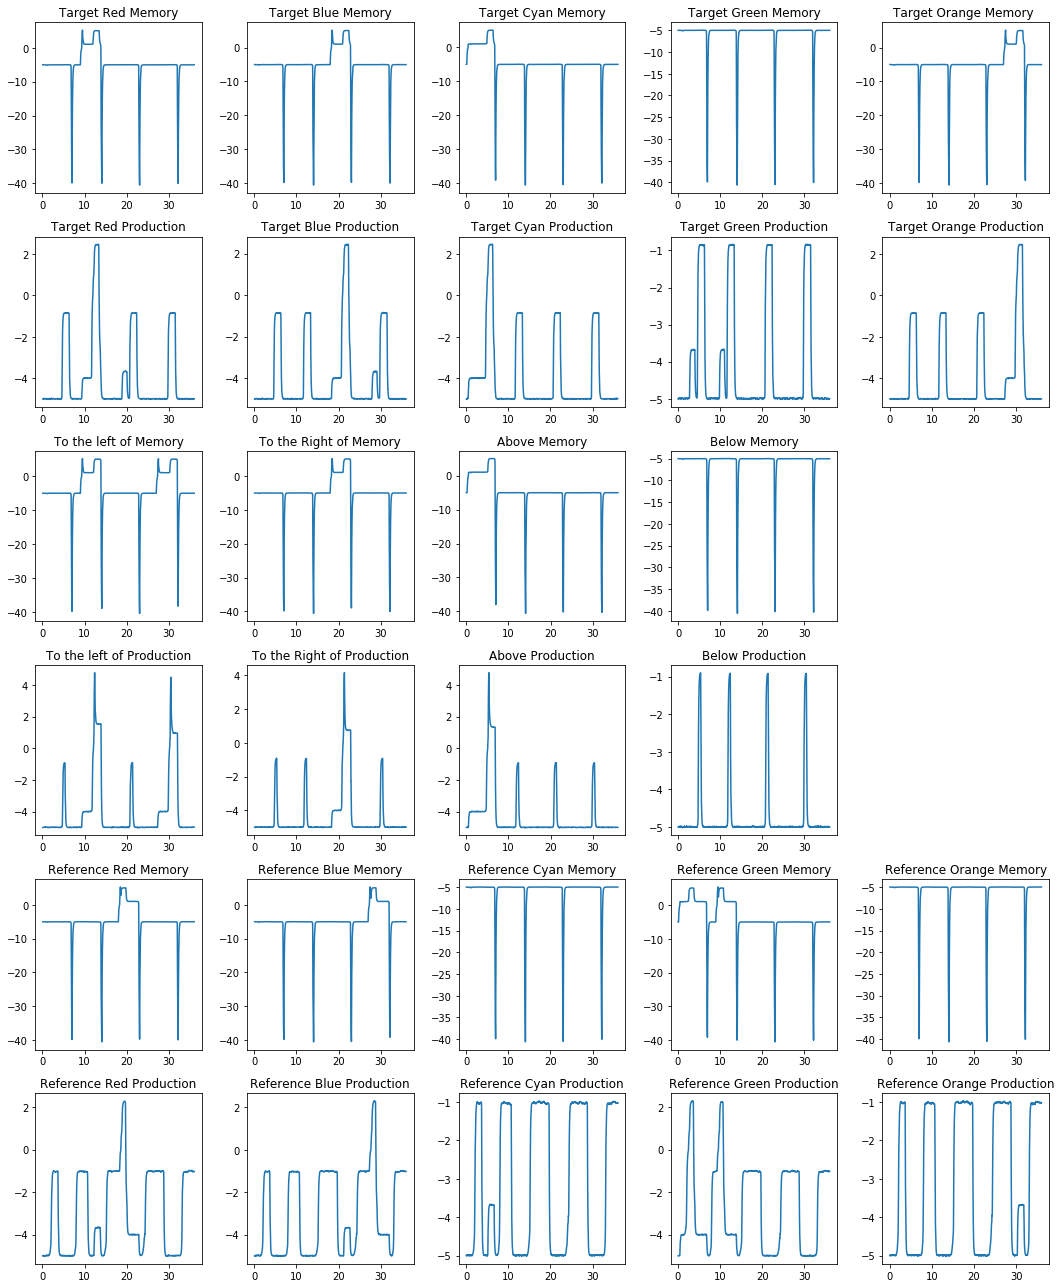

In [6]:
plot_0d = ['Target Red Memory', 'Target Blue Memory', 'Target Cyan Memory', 
           'Target Green Memory', 'Target Orange Memory ', 'Target Red Production', 
           'Target Blue Production', 'Target Cyan Production', 'Target Green Production', 
           'Target Orange Production', 'To the left of Memory', 'To the Right of Memory',
           'Above Memory', 'Below Memory', 'Empty','To the left of Production', 
           'To the Right of Production', 'Above Production', 'Below Production', 'Empty',
           'Reference Red Memory', 'Reference Blue Memory', 'Reference Cyan Memory', 
           'Reference Green Memory', 'Reference Orange Memory',
           'Reference Red Production', 'Reference Blue Production', 
           'Reference Cyan Production', 'Reference Green Production', 
           'Reference Orange Production']

plt.figure(figsize=(15,18))
for i, name in enumerate(plot_0d):
    if name == 'Empty':
        continue
    plt.subplot(6,5,i+1)
    
    x = cedar_data[name][0]
    x = [float(t.rsplit(' ', 1)[0]) for t in x]
    plt.plot(x, cedar_data[name][1])
    name_split = name.rsplit('.',1)
    if len(name_split) > 1:
        plt.title(name_split[1])
    else:
        plt.title(name)

plt.tight_layout()
if not os.path.isdir('../../images/%s' %dir_name):
    os.mkdir('../../images/%s' %dir_name)
# plt.savefig('../../images/%s/Memory and Production Nodes_%s.png' %(dir_name, time_factor))
plt.show()


## 1-dimensional color field from Plot Widget


(2769, 51)


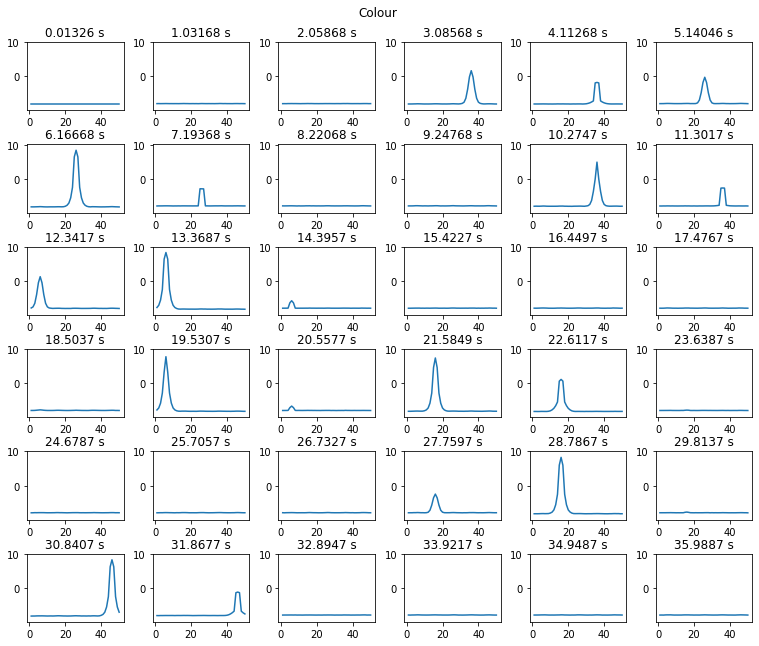

In [7]:
time_points = np.linspace(0,cedar_data['Colour'].shape[0]-1,36)
print(cedar_data['Colour'].shape)
plot_1dneuralfield(cedar_data['Colour'],time_points, title='Colour')

## Spatial scene

(2769, 2501)


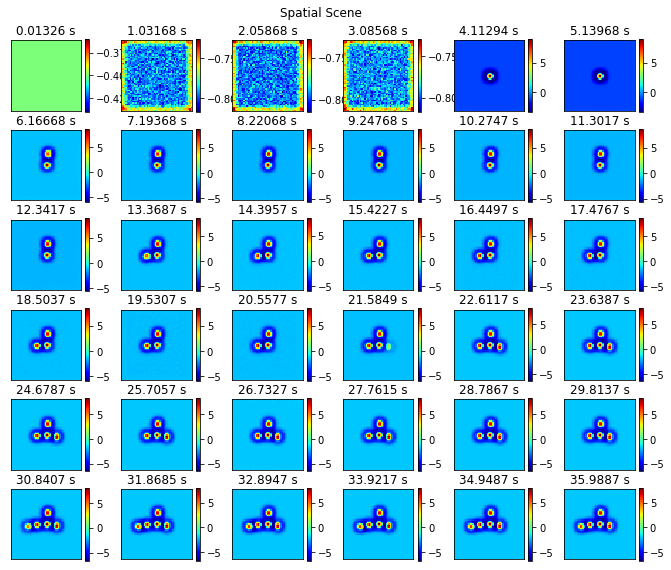

In [8]:
time_points = np.linspace(0,cedar_data['Indeterminent '].shape[0]-1,36)
print(cedar_data['Indeterminent '].shape)
plot_2dneuralfield(cedar_data['Indeterminent '], time_points, colorbar=True, title='Spatial Scene',
                  save=False)

## Object-centered and its sources

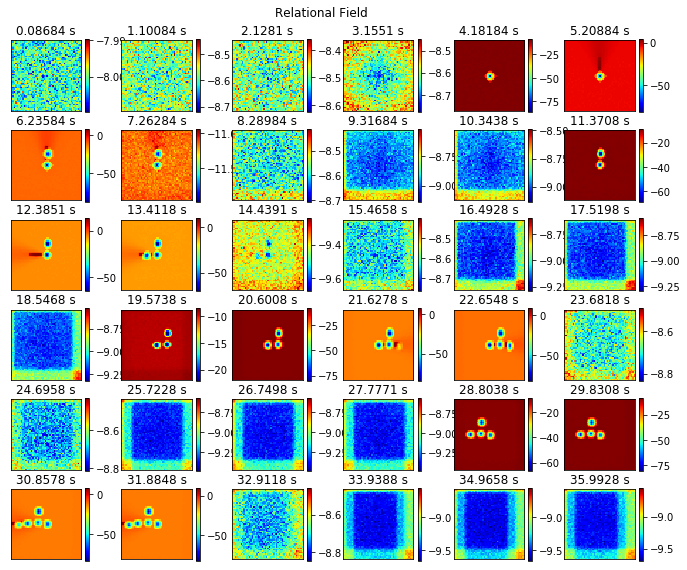

In [9]:
time_points = np.linspace(0,cedar_data['Object-centered '].shape[0]-1,36)
plot_2dneuralfield(cedar_data['Object-centered '], time_points, colorbar=True, 
                   title='Relational Field', save=False)

## Target

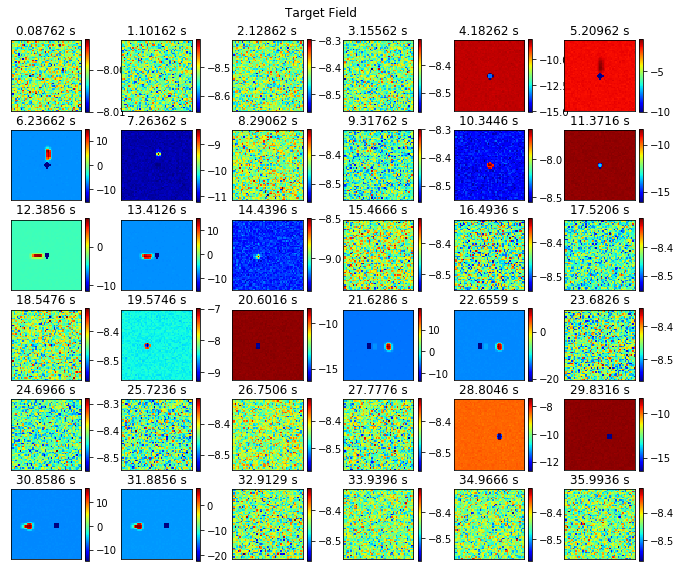

In [10]:
time_points = np.linspace(0,cedar_data['Target'].shape[0]-1,36)
plot_2dneuralfield(cedar_data['Target'], time_points, colorbar=True, title='Target Field',
                   save=False)

## Reference

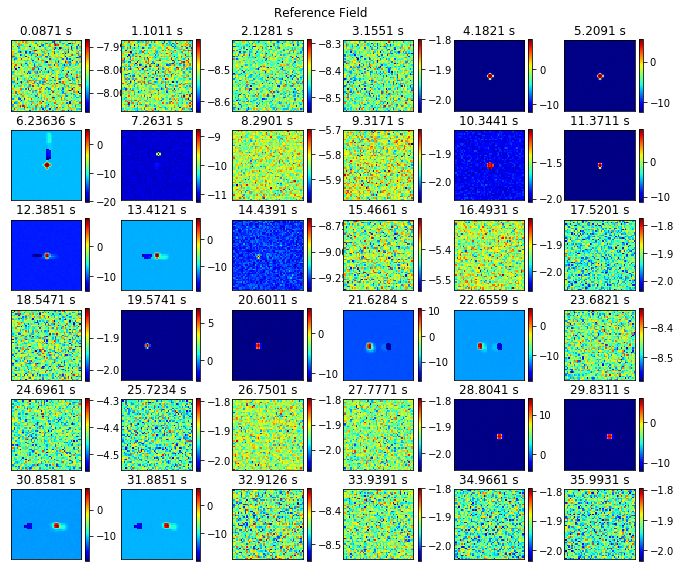

In [11]:
time_points = np.linspace(0,cedar_data['Reference'].shape[0]-1,36)
plot_2dneuralfield(cedar_data['Reference'], time_points, colorbar=True, title='Reference Field',
                   save=False)